# Kredi Kartı Harcama Analizi

In [1]:
# gerekli kutuphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
# veri
users = pd.read_csv("users.csv")
transactions = pd.read_csv("transactions.csv")

### Veri Setlerinin İncelenmesi

In [3]:
users.head()

,User,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,11363,40.76,-73.74,$37891,$77254,$191349,701,5
2,2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,91792,34.02,-117.89,$22681,$33483,$196,698,5
3,3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,NaN,New York,NY,10069,40.71,-73.99,$163145,$249925,$202328,722,4
4,4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,NaN,San Francisco,CA,94117,37.76,-122.44,$53797,$109687,$183855,675,1


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   User                         2000 non-null   int64  
 1   Person                       2000 non-null   object 
 2   Current Age                  2000 non-null   int64  
 3   Retirement Age               2000 non-null   int64  
 4   Birth Year                   2000 non-null   int64  
 5   Birth Month                  2000 non-null   int64  
 6   Gender                       2000 non-null   object 
 7   Address                      2000 non-null   object 
 8   Apartment                    528 non-null    float64
 9   City                         2000 non-null   object 
 10  State                        2000 non-null   object 
 11  Zipcode                      2000 non-null   int64  
 12  Latitude                     2000 non-null   float64
 13  Longitude         

Users veri setindeki bazı sütunlarının (_Per Capital Income - Zip Code_, _Yearly Income - Person_ ve _Total Debt_) başında `$` işareti bulunuyor. Bu dolar işaretlerini kaldırıp daha sonrasında bu sütunların tipini numeric (`float`) yapmalıyız, bu sayede daha kolay analiz yapabiliriz.

In [5]:
for col in ["Per Capita Income - Zipcode", "Yearly Income - Person", "Total Debt"]:
	users[col] = users[col].astype(str).str.replace('$', '', regex= False).astype(float)

_Apartment_ sütunu çok fazla `NaN` değere sahip. Bu şekilde bırakmak veri setinin tutarsız olmasına sebep olur, bu sebeple boş değerleri `None` yapmalıyız.

In [6]:
users["Apartment"] = users["Apartment"].fillna("None").astype(str)

_Zipcode_ sütunu tanımlayıcıdır ve bu sebeple sayısal bir değer tutması doğru değildir, çünkü hem üzerinde matematiksel işlem yapılmayacak hem de bazı zip kodları `0` ile başlayabilir.

In [7]:
users["Zipcode"] = users["Zipcode"].astype(str)

_Gender_ sütunu tek bir cinsiyeti belirten birden fazla değere sahip olabilir, örneğin kadın için hem "F" hem de "Female" bulunabilir. Bunu kontrol etmeliyiz.

In [8]:
users["Gender"].unique()

array(['Female', 'Male'], dtype=object)

_Age_ sütunu gerçekçi bir aralık belirtmeli.

In [9]:
users["Current Age"].value_counts().sort_index()

Current Age
18     77
19     34
20     40
21     40
22     43
       ..
93      1
94      2
98      2
99      1
101     1
Name: count, Length: 80, dtype: int64

Eğer herhangi bir tekrarlama varsa bunlar kaldırılmalı.

In [10]:
users.drop_duplicates(subset=["User"], inplace= True)

In [11]:
# son hali
users.head()

,User,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,None,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5
1,1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,None,Little Neck,NY,11363,40.76,-73.74,37891.0,77254.0,191349.0,701,5
2,2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,None,West Covina,CA,91792,34.02,-117.89,22681.0,33483.0,196.0,698,5
3,3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,None,New York,NY,10069,40.71,-73.99,163145.0,249925.0,202328.0,722,4
4,4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,None,San Francisco,CA,94117,37.76,-122.44,53797.0,109687.0,183855.0,675,1


In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   User                         2000 non-null   int64  
 1   Person                       2000 non-null   object 
 2   Current Age                  2000 non-null   int64  
 3   Retirement Age               2000 non-null   int64  
 4   Birth Year                   2000 non-null   int64  
 5   Birth Month                  2000 non-null   int64  
 6   Gender                       2000 non-null   object 
 7   Address                      2000 non-null   object 
 8   Apartment                    2000 non-null   object 
 9   City                         2000 non-null   object 
 10  State                        2000 non-null   object 
 11  Zipcode                      2000 non-null   object 
 12  Latitude                     2000 non-null   float64
 13  Longitude         

Benzer işlemleri `transactions` veriseti için de yapmalıyız. 

In [13]:
transactions.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,102,0,2002,9,1,06:21,2.08,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,435,0,2002,9,1,06:42,5.59,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,348,0,2002,9,2,06:22,132.12,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,270,0,2002,9,2,17:45,60.91,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,106,0,2002,9,3,06:23,118.74,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


In [14]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19963 entries, 0 to 19962
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User            19963 non-null  int64  
 1   Card            19963 non-null  int64  
 2   Year            19963 non-null  int64  
 3   Month           19963 non-null  int64  
 4   Day             19963 non-null  int64  
 5   Time            19963 non-null  object 
 6   Amount          19963 non-null  float64
 7   Use Chip        19963 non-null  object 
 8   Merchant Name   19963 non-null  int64  
 9   Merchant City   19963 non-null  object 
 10  Merchant State  18646 non-null  object 
 11  Zip             18316 non-null  float64
 12  MCC             19963 non-null  int64  
 13  Errors?         574 non-null    object 
 14  Is Fraud?       19963 non-null  object 
dtypes: float64(2), int64(7), object(6)
memory usage: 2.3+ MB


`Merchant State` ve `Zip` sütunlarında boş değerler var. Dikkatli bakıldığında `Merchant State` değeri boş olan girdilerde `Merchant City` sütunu değerlerinin tamamının 'ONLINE' olduğunu görüyoruz. Buradan işlemlerin fiziksel bir mağazada değil online bir şekilde gerçekleştirildiğini çıkarabiliriz. Veri temizleme açısından `Merchant State`'i "Online" veya "Virtual" gibi bir kategori ile doldurmak daha anlamlı olabilir. Bu açıdan `Zip`değerlerini de 0 ile doldurup string veri tipi ile değiştirebiliriz.

In [15]:
transactions[transactions["Merchant State"].isna()]

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
11,214,0,2002,9,5,20:41,1.00,Online Transaction,-9092677072201095172,ONLINE,NaN,NaN,4900,NaN,No
24,491,0,2002,9,9,20:02,96.87,Online Transaction,-8338381919281017248,ONLINE,NaN,NaN,4899,NaN,No
85,359,0,2002,9,30,06:21,1.00,Online Transaction,-7421093378627544099,ONLINE,NaN,NaN,5311,NaN,No
99,201,0,2002,10,6,06:14,68.46,Online Transaction,-7421093378627544099,ONLINE,NaN,NaN,5311,NaN,No
106,455,0,2002,10,9,08:16,219.56,Online Transaction,-4956618006720593695,ONLINE,NaN,NaN,5193,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19925,298,3,2020,2,19,08:56,1.00,Online Transaction,-9092677072201095172,ONLINE,NaN,NaN,4900,NaN,No
19940,471,4,2008,9,30,17:42,1.00,Online Transaction,-521141999023077663,ONLINE,NaN,NaN,5815,NaN,No
19941,252,4,2008,10,2,17:31,118.82,Online Transaction,6455213054093379528,ONLINE,NaN,NaN,5815,NaN,No
19943,435,4,2008,10,6,17:33,1.00,Online Transaction,6455213054093379528,ONLINE,NaN,NaN,5815,NaN,No


In [16]:
transactions[transactions["Merchant State"].isna()]["Merchant City"].unique()

array(['ONLINE'], dtype=object)

In [17]:
transactions["Merchant State"] = transactions.apply(
	lambda x: "Online"
	if pd.isna(x["Merchant State"]) and x["Merchant City"] == "ONLINE"
	else x["Merchant State"],
	axis= 1
)

In [18]:
transactions["Zip"] = transactions["Zip"].fillna(0).astype(int).astype(str)

In [19]:
transactions[transactions["Merchant State"] == "Online"]

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
11,214,0,2002,9,5,20:41,1.00,Online Transaction,-9092677072201095172,ONLINE,Online,0,4900,NaN,No
24,491,0,2002,9,9,20:02,96.87,Online Transaction,-8338381919281017248,ONLINE,Online,0,4899,NaN,No
85,359,0,2002,9,30,06:21,1.00,Online Transaction,-7421093378627544099,ONLINE,Online,0,5311,NaN,No
99,201,0,2002,10,6,06:14,68.46,Online Transaction,-7421093378627544099,ONLINE,Online,0,5311,NaN,No
106,455,0,2002,10,9,08:16,219.56,Online Transaction,-4956618006720593695,ONLINE,Online,0,5193,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19925,298,3,2020,2,19,08:56,1.00,Online Transaction,-9092677072201095172,ONLINE,Online,0,4900,NaN,No
19940,471,4,2008,9,30,17:42,1.00,Online Transaction,-521141999023077663,ONLINE,Online,0,5815,NaN,No
19941,252,4,2008,10,2,17:31,118.82,Online Transaction,6455213054093379528,ONLINE,Online,0,5815,NaN,No
19943,435,4,2008,10,6,17:33,1.00,Online Transaction,6455213054093379528,ONLINE,Online,0,5815,NaN,No


`Is Fraud?` sütunu binary bir sütun (Yes/No), bu değerleri 0/1 şeklinde sayısal veri olarak tutmak ileride modellemeyi kolaylaştırabilir.

In [20]:
transactions["Is Fraud?"] = transactions["Is Fraud?"].map({"Yes": 1, "No": 0})

Veri setinde zamanı ifade etmek için 4 farklı sütun kullanılmış (`Year`, `Month`, `Day` ve `Time`), bu sütunları birleştirerek tek bir `datetime`kolonu oluşturmak zaman bazlı analizleri kolaylaştırabilir.

In [21]:
transactions["Date"] = pd.to_datetime(
	transactions["Year"].astype(str) + "-" +
	transactions["Month"].astype(str) + "-" +
	transactions["Day"].astype(str) + " " +
	transactions["Time"]
)

transactions.drop(columns=["Year", "Month", "Day", "Time"], inplace= True)

In [22]:
transactions.head()

,User,Card,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Date
0,102,0,2.08,Swipe Transaction,3527213246127876953,La Verne,CA,91750,5300,NaN,0,2002-09-01 06:21:00
1,435,0,5.59,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754,5411,NaN,0,2002-09-01 06:42:00
2,348,0,132.12,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754,5411,NaN,0,2002-09-02 06:22:00
3,270,0,60.91,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754,5651,NaN,0,2002-09-02 17:45:00
4,106,0,118.74,Swipe Transaction,5817218446178736267,La Verne,CA,91750,5912,NaN,0,2002-09-03 06:23:00


`Merchant Name` sütunu her ne kadar sayısal bir değermiş gibi görünse de aslında kategoriktir. String'e çevirmek analiz ve gruplama işlemlerini kolaylaştırabilir.

In [23]:
transactions["Merchant Name"] = transactions["Merchant Name"].astype(str)

`Errors?` sütununda çok fazla boş değer var fakat bu sütun ileride dolandırıcılık tahminlerinde kullanılabilecek önemli verileri içerebilir, bu sebeple `Is Fraud?` sütunundan "0" gelen satırlarda `Errors?` sütunlarına "No Error" yazmak doğru bir yaklaşım olabilir.

In [24]:
transactions.loc[(transactions["Is Fraud?"] == 0) &
				 (transactions["Errors?"].isna()), "Errors?"] = "No Error"

`Is Fraud?` sütunundan "1" gelen satırlarda `Errors?` sütunlarına "Unknown Error" gibi bir etiket atmak daha güvenli olur.

In [25]:
transactions.loc[(transactions["Is Fraud?"] == 1) &
				 (transactions["Errors?"].isna()), "Errors?"] = "Unknown Error"

Tekrarlı veri varsa onları da kaldırmalıyız.

In [26]:
transactions.drop_duplicates(inplace= True)

In [27]:
# son hali
transactions.head()

,User,Card,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Date
0,102,0,2.08,Swipe Transaction,3527213246127876953,La Verne,CA,91750,5300,No Error,0,2002-09-01 06:21:00
1,435,0,5.59,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754,5411,No Error,0,2002-09-01 06:42:00
2,348,0,132.12,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754,5411,No Error,0,2002-09-02 06:22:00
3,270,0,60.91,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754,5651,No Error,0,2002-09-02 17:45:00
4,106,0,118.74,Swipe Transaction,5817218446178736267,La Verne,CA,91750,5912,No Error,0,2002-09-03 06:23:00


In [28]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19963 entries, 0 to 19962
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   User            19963 non-null  int64         
 1   Card            19963 non-null  int64         
 2   Amount          19963 non-null  float64       
 3   Use Chip        19963 non-null  object        
 4   Merchant Name   19963 non-null  object        
 5   Merchant City   19963 non-null  object        
 6   Merchant State  19963 non-null  object        
 7   Zip             19963 non-null  object        
 8   MCC             19963 non-null  int64         
 9   Errors?         19963 non-null  object        
 10  Is Fraud?       19963 non-null  int64         
 11  Date            19963 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 1.8+ MB


### Veri Setlerinin Birleştirilmesi

In [29]:
merged_df = transactions.merge(users, on= "User", how= "inner")

In [30]:
merged_df.head()

,User,Card,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,...,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,102,0,2.08,Swipe Transaction,3527213246127876953,La Verne,CA,91750,5300,No Error,...,Maywood,IL,60153,41.88,-87.84,15451.0,22158.0,19101.0,681,5
1,102,0,1.00,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754,5411,No Error,...,Maywood,IL,60153,41.88,-87.84,15451.0,22158.0,19101.0,681,5
2,102,0,148.30,Swipe Transaction,5817218446178736267,La Verne,CA,91750,5912,No Error,...,Maywood,IL,60153,41.88,-87.84,15451.0,22158.0,19101.0,681,5
3,102,0,87.14,Swipe Transaction,3527213246127876953,La Verne,CA,91750,5300,No Error,...,Maywood,IL,60153,41.88,-87.84,15451.0,22158.0,19101.0,681,5
4,102,0,47.90,Swipe Transaction,3527213246127876953,La Verne,CA,91750,5300,No Error,...,Maywood,IL,60153,41.88,-87.84,15451.0,22158.0,19101.0,681,5


In [31]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19963 entries, 0 to 19962
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   User                         19963 non-null  int64         
 1   Card                         19963 non-null  int64         
 2   Amount                       19963 non-null  float64       
 3   Use Chip                     19963 non-null  object        
 4   Merchant Name                19963 non-null  object        
 5   Merchant City                19963 non-null  object        
 6   Merchant State               19963 non-null  object        
 7   Zip                          19963 non-null  object        
 8   MCC                          19963 non-null  int64         
 9   Errors?                      19963 non-null  object        
 10  Is Fraud?                    19963 non-null  int64         
 11  Date                         19963 non-nu

### Yapılacak İşlemler

In [32]:
merged_df.columns

Index(['User', 'Card', 'Amount', 'Use Chip', 'Merchant Name', 'Merchant City',
       'Merchant State', 'Zip', 'MCC', 'Errors?', 'Is Fraud?', 'Date',
       'Person', 'Current Age', 'Retirement Age', 'Birth Year', 'Birth Month',
       'Gender', 'Address', 'Apartment', 'City', 'State', 'Zipcode',
       'Latitude', 'Longitude', 'Per Capita Income - Zipcode',
       'Yearly Income - Person', 'Total Debt', 'FICO Score',
       'Num Credit Cards'],
      dtype='object')

***En Fazla Harcama Yapılan Şehirler***

1. `Merchant City` kolonuna göre toplam harcama miktarını hesaplayın.

2. En fazla harcama yapılan ilk 10 şehri sıralayarak bir bar grafik ile gösterin.

In [33]:
# 1.
city_spending = merged_df.groupby("Merchant City")["Amount"].sum().sort_values(ascending= False)
city_spending.head(10)

Merchant City
La Verne         1045322.48
Monterey Park     283294.79
Mira Loma         228943.63
ONLINE            130398.07
Cancun             10768.53
Ontario             9425.28
Las Vegas           8493.74
Marlton             7197.77
Diamond Bar         6595.03
San Antonio         5402.24
Name: Amount, dtype: float64

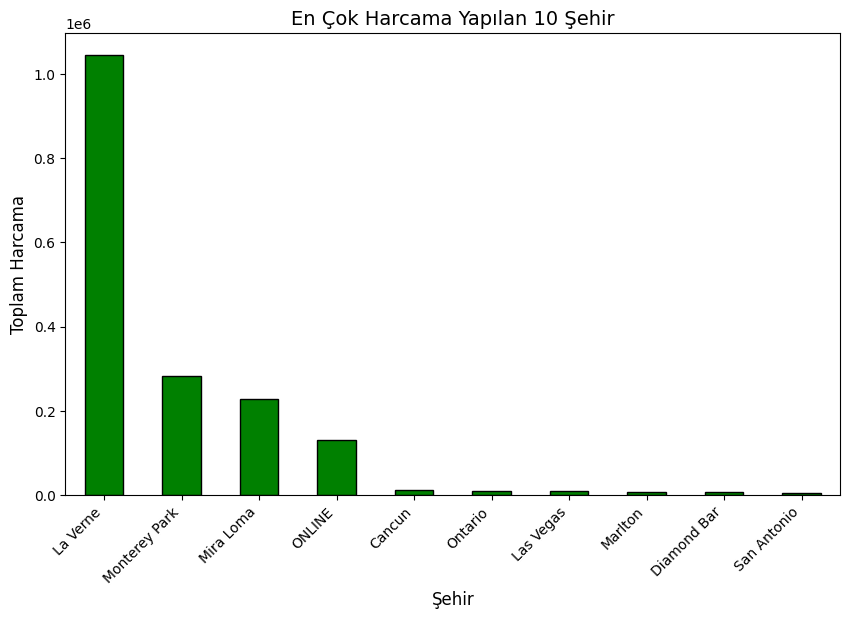

In [34]:
# 2.
top10_cities = city_spending.head(10) # ilk 10 şehir

plt.figure(figsize=(10, 6))
top10_cities.plot(kind= "bar", color= "green", edgecolor= "black")

plt.title("En Çok Harcama Yapılan 10 Şehir", fontsize= 14)
plt.xlabel("Şehir", fontsize= 12)
plt.ylabel("Toplam Harcama", fontsize= 12)
plt.xticks(rotation= 45, ha= "right")
plt.show()

**Sonuç**

En çok harcamanın yapıldığı şehir La Verne olurken, onu açık ara farkla Monterey Park ve Mira Loma takip ediyor. Dikkat çekici olan diğer bir nokta ise, Online işlemlerinin dördüncü sırada olması. Bu durum kullanıcıların fiziksel mağazalar dışında çevrim içi alışverile de yoğun şekilde yöneldiğini gösteriyor.

***Saatlik Harcama Dağılımı***

1. Her saate karşılık gelen toplam harcamayı hesaplayın.

2. Sonuçları bir çizgi grafik ile gösterin.

In [35]:
# 1.
merged_df["Hour"] = merged_df["Date"].dt.hour
hourly_spending = merged_df.groupby("Hour")["Amount"].sum()
hourly_spending

Hour
0       5001.90
1       1177.99
2       2042.49
3       2560.96
4       1753.44
5      72221.95
6     897523.69
7      55786.57
8      17614.61
9      93127.71
10     38305.72
11     38894.18
12     39054.18
13    290185.72
14     36560.55
15      8017.31
16     62383.46
17     24424.23
18      7373.05
19     34985.01
20    151329.55
21     28145.99
22     12124.46
23      5684.09
Name: Amount, dtype: float64

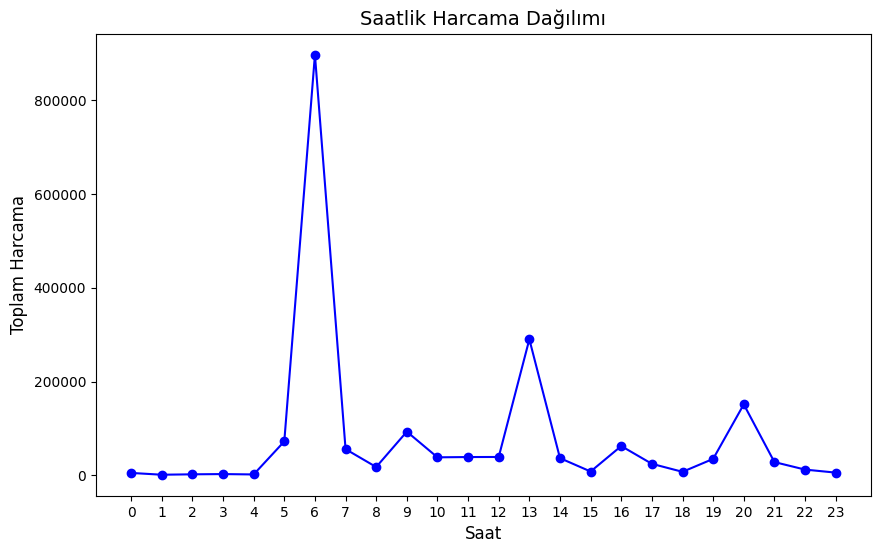

In [36]:
# 2.
plt.figure(figsize= (10, 6))
hourly_spending.plot(kind= "line", marker= "o", linestyle= "-", color= "blue")

plt.title("Saatlik Harcama Dağılımı", fontsize= 14)
plt.xlabel("Saat", fontsize= 12)
plt.ylabel("Toplam Harcama", fontsize= 12)
plt.xticks(range(0, 24))
plt.show()

**Sonuç**

En büyük harcama yoğunluğu sabah 6.00’da gerçekleşmiş. Bu kadar yüksek bir sıçrama, ya çok büyük tekil işlemlerden ya da belirli bir kampanya/promosyon etkisinden kaynaklanıyor olabilir. Ayrıca öğle 13.00 civarında da dikkat çekici bir artış var, bu da öğle tatilinde yapılan alışverişlere işaret edebilir. Akşam saatlerinde ise özellikle 20.00’de tekrar belirgin bir harcama artışı gözleniyor.

Gece yarısı ve sabaha karşı (0.00–4.00 arası) harcamalar oldukça düşük seviyede kalmış; bu da alışverişlerin ağırlıklı olarak gündüz ve akşam saatlerinde yoğunlaştığını gösteriyor.

***Cinsiyete Göre Harcama***

1. Kullanıcıların cinsiyetine göre toplam harcama miktarlarını gruplandırın.

2. Bar grafik yardımıyla karşılaştırma yapın.

In [37]:
# 1.
gender_spending = merged_df.groupby("Gender")["Amount"].sum().sort_values(ascending= False)
gender_spending

Gender
Female    984753.45
Male      941525.36
Name: Amount, dtype: float64

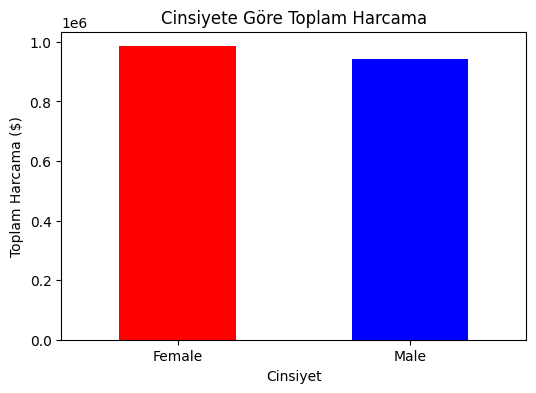

In [38]:
plt.figure(figsize=(6,4))

gender_spending.plot(kind="bar", color=["red", "blue"])
plt.title("Cinsiyete Göre Toplam Harcama")
plt.xlabel("Cinsiyet")
plt.ylabel("Toplam Harcama ($)")
plt.xticks(rotation=0)
plt.show()

**Sonuç**

Kullanıcıların cinsiyetlerine göre toplam harcama miktarları oldukçayakın. Kadın kullanıcılar toplam harcamada erkeklerden biraz önde, ancak fark çok büyük değil. Bu, her iki cinsiyetin de harcama alışkanlıklarının genel olarak dengeli olduğunu gösteriyor.

***Gelire Göre Harcama***

1. `Yearly Income - Person` kolonundaki `$` işaretini kaldırarak sayıya çevirin. (bunu zaten yapmıştık yukarıda)

2. Yıllık gelir ile harcama miktarı arasındaki ilişkiyi dağılım grafiği (scatter plot) ile gösterin.

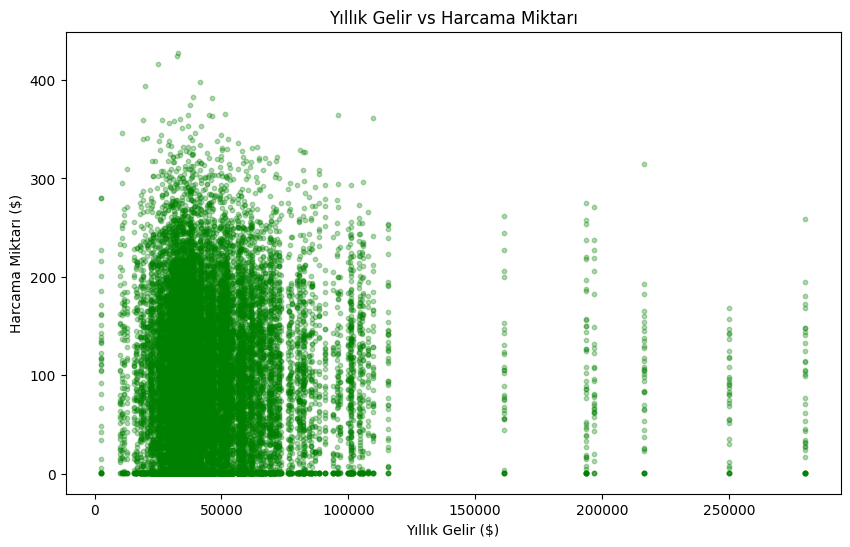

In [39]:
# 2.
plt.figure(figsize= (10, 6))
plt.scatter(
	merged_df["Yearly Income - Person"],
	merged_df["Amount"], alpha= 0.3, s=10, color= "green"
)

plt.title("Yıllık Gelir vs Harcama Miktarı")
plt.xlabel("Yıllık Gelir ($)")
plt.ylabel("Harcama Miktarı ($)")
plt.show()

Grafik bu haliyle pek okunaklı değil, daha okunabilir hale getirmeyi deneyebiliriz.

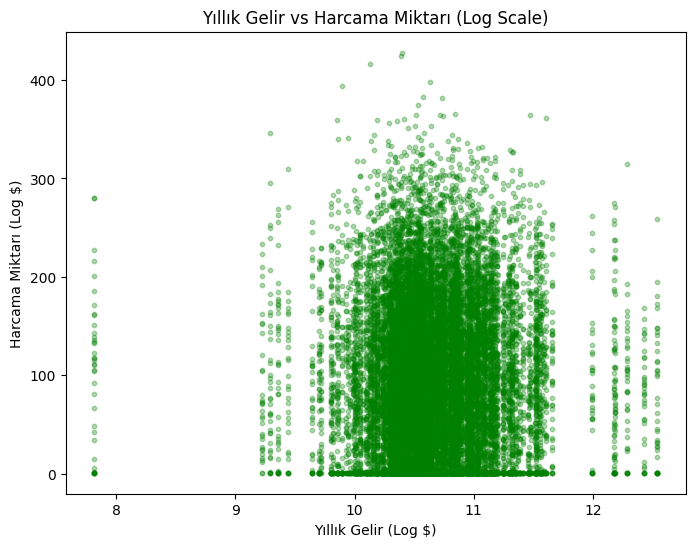

In [40]:
x = merged_df["Yearly Income - Person"]
y = merged_df["Amount"]

# log dönüşümü
log_x = np.log1p(x)

plt.figure(figsize=(8,6))
plt.scatter(log_x, y, alpha=0.3, s=10, color="green")

plt.title("Yıllık Gelir vs Harcama Miktarı (Log Scale)")
plt.xlabel("Yıllık Gelir (Log $)")
plt.ylabel("Harcama Miktarı (Log $)")
plt.show()

**Sonuç**

Genel olarak gelir arttıkça harcama da artıyor fakat çok sıkışık, özellikle orta gelir aralığında çok fazla nokta var. Düşük ve yüksek gelirlerde çok fazla uç nokta var, log scale bunu biraz düzeltmeye çalıştık ama hala yoğunluk farkları mevcut. Trend çizgisi eklenirsegenel artış eğilimi rahatça görülebilir.

### Aşama 3: Değerlendirme

ChatGPT'nin örneği (Python): Yaşa Göre Ortalama Harcama

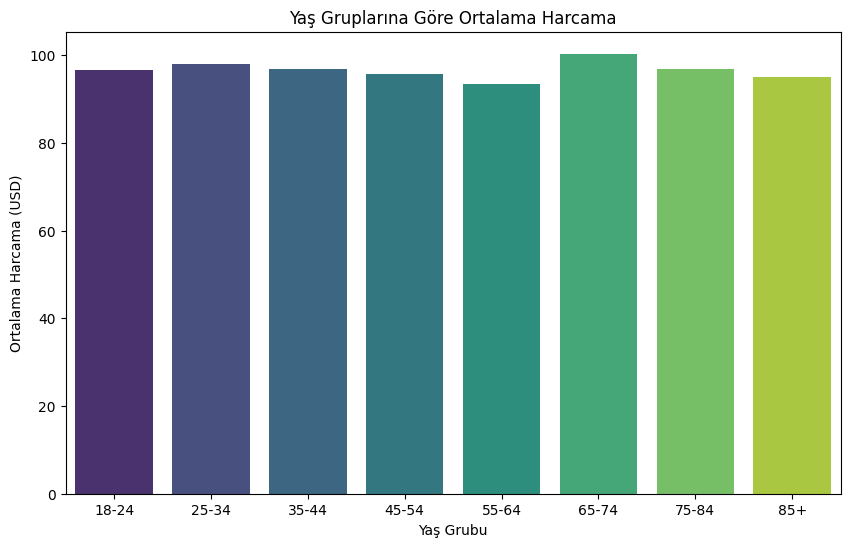

In [41]:
# Yaş gruplarını oluştur
bins = [18, 25, 35, 45, 55, 65, 75, 85, 100]
labels = ["18-24","25-34","35-44","45-54","55-64","65-74","75-84","85+"]
merged_df["Age Group"] = pd.cut(merged_df["Current Age"], bins=bins, labels=labels, right=False)

# Yaş grubuna göre ortalama harcama
age_spending = merged_df.groupby("Age Group")["Amount"].mean().reset_index()

# Bar chart
plt.figure(figsize=(10,6))
sns.barplot(x="Age Group", y="Amount", data=age_spending ,palette="viridis")
plt.title("Yaş Gruplarına Göre Ortalama Harcama")
plt.xlabel("Yaş Grubu")
plt.ylabel("Ortalama Harcama (USD)")
plt.show()